<h1 align=center>K-Means Clustering</h1>
<hr>

# 1. Bibliotheques

In [24]:
import numpy as np
import pandas as pd
  
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

# 2. Les paramètres pour la visualisation

In [25]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 7, 4

# 3. Données

In [26]:
iris = datasets.load_iris()
X = scale(iris.data)
y = pd.DataFrame(iris.target)
varianle_name = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

# 4. On fait et on lance notre model

In [27]:
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

# 5. On fait un diagramme plot de model

In [28]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

# 6. On affiche un plot

Text(0.5, 1.0, '\nK-Means Classification\n')

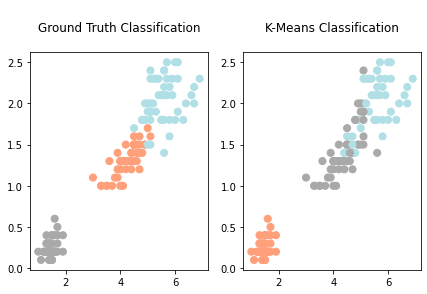

In [33]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])
 
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c = color_theme[iris.target], s = 50)
plt.title('\nGround Truth Classification\n')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c = color_theme[clustering.labels_], s = 50)
plt.title('\nK-Means Classification\n')

# 7. On réattribue les noms des labels

Text(0.5, 1.0, '\nK-Means Classification\n')

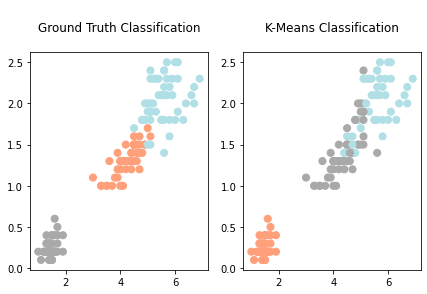

In [36]:
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c = color_theme[iris.target], s = 50)
plt.title('\nGround Truth Classification\n')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c = color_theme[clustering.labels_], s = 50)
plt.title('\nK-Means Classification\n')

# 8. On vérifie les paramétres de K-mean classtering

In [37]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.23      0.22      0.23        50
           2       0.26      0.28      0.27        50

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.50      0.50      0.50       150



# 9. Conclusion

_Le clasteur avec le numèro 0 a la plus haute précision = 1.00. Les autres clasteurs ont été analysées en fonction de la première, donc ils ne sont pas sûrs, et donc leurs précisions sont moindre._